# Predicting Post Popularity

#### Goal
To find how many times the posts are shared in the social media as a popularity of that post (if the post gets viral)

### Data Set Information:
**This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).**
- The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. 
- The original content be publicly accessed and retrieved using the provided urls. 
- Acquisition date: January 8, 2015 

### Features description
**Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 target)**
Attribute Information: 
0. url: URL of the article (non-predictive) 
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive) 
2. n_tokens_title: Number of words in the title 
3. n_tokens_content: Number of words in the content 
4. n_unique_tokens: Rate of unique words in the content 
5. n_non_stop_words: Rate of non-stop words in the content 
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
7. num_hrefs: Number of links 
8. num_self_hrefs: Number of links to other articles published by Mashable 
9. num_imgs: Number of images 
10. num_videos: Number of videos 
11. average_token_length: Average length of the words in the content 
12. num_keywords: Number of keywords in the metadata 
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'? 
14. data_channel_is_entertainment: Is data channel 'Entertainment'? 
15. data_channel_is_bus: Is data channel 'Business'? 
16. data_channel_is_socmed: Is data channel 'Social Media'? 
17. data_channel_is_tech: Is data channel 'Tech'? 
18. data_channel_is_world: Is data channel 'World'? 
19. kw_min_min: Worst keyword (min. shares) 
20. kw_max_min: Worst keyword (max. shares) 
21. kw_avg_min: Worst keyword (avg. shares) 
22. kw_min_max: Best keyword (min. shares) 
23. kw_max_max: Best keyword (max. shares) 
24. kw_avg_max: Best keyword (avg. shares) 
25. kw_min_avg: Avg. keyword (min. shares) 
26. kw_max_avg: Avg. keyword (max. shares) 
27. kw_avg_avg: Avg. keyword (avg. shares) 
28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
29. self_reference_max_shares: Max. shares of referenced articles in Mashable 
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable 
31. weekday_is_monday: Was the article published on a Monday? 
32. weekday_is_tuesday: Was the article published on a Tuesday? 
33. weekday_is_wednesday: Was the article published on a Wednesday? 
34. weekday_is_thursday: Was the article published on a Thursday? 
35. weekday_is_friday: Was the article published on a Friday? 
36. weekday_is_saturday: Was the article published on a Saturday? 
37. weekday_is_sunday: Was the article published on a Sunday? 
38. is_weekend: Was the article published on the weekend? 
39. LDA_00: Closeness to LDA topic 0 
40. LDA_01: Closeness to LDA topic 1 
41. LDA_02: Closeness to LDA topic 2 
42. LDA_03: Closeness to LDA topic 3 
43. LDA_04: Closeness to LDA topic 4 
44. global_subjectivity: Text subjectivity 
45. global_sentiment_polarity: Text sentiment polarity 
46. global_rate_positive_words: Rate of positive words in the content 
47. global_rate_negative_words: Rate of negative words in the content 
48. rate_positive_words: Rate of positive words among non-neutral tokens 
49. rate_negative_words: Rate of negative words among non-neutral tokens 
50. avg_positive_polarity: Avg. polarity of positive words 
51. min_positive_polarity: Min. polarity of positive words 
52. max_positive_polarity: Max. polarity of positive words 
53. avg_negative_polarity: Avg. polarity of negative words 
54. min_negative_polarity: Min. polarity of negative words 
55. max_negative_polarity: Max. polarity of negative words 
56. title_subjectivity: Title subjectivity 
57. title_sentiment_polarity: Title polarity 
58. abs_title_subjectivity: Absolute subjectivity level 
59. abs_title_sentiment_polarity: Absolute polarity level 
60. shares: Number of shares (target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
file_url = ".\\data\\OnlineNewsPopularity.csv"
articles = pd.read_csv(file_url)
articles.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
articles.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

## Data Preparation

In [4]:
articles = articles.rename(columns = lambda x: x.strip())
non_predictive = ["url", "timedelta"]
articles.drop(non_predictive, axis = 1, inplace = True)
articles = articles[(articles["shares"]>100) & (articles["shares"]<15000)]
articles["shares"] = np.log(articles["shares"])

In [5]:
articles.shape

(38273, 59)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

#### Scalling and splitting the dataset

In [7]:
target_name = "shares"
RS = RobustScaler()
X = articles.drop(target_name, axis = 1)
y = articles[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

## Prediction models

#### Preparing a DataFrame for model comparisions

In [8]:
models = pd.DataFrame(index = ["MSE_train", "MSE_test"], columns = ["NULL", "MLR", "KNN", "LASSO"])
models

,NULL,MLR,KNN,LASSO
MSE_train,NaN,NaN,NaN,NaN
MSE_test,NaN,NaN,NaN,NaN


### A. Null Model

In [9]:
y_pred_null = y.mean()
y_pred_null_train = [y_pred_null] * y_train.size
y_pred_null_test = [y_pred_null] * y_test.size
models.loc["MSE_train", "NULL"] = mean_squared_error(y_pred = y_pred_null_train, y_true = y_train)
models.loc["MSE_test", "NULL"] = mean_squared_error(y_pred = y_pred_null_test, y_true = y_test)

### B. Multiple Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)
models.loc["MSE_train", "MLR"] = mean_squared_error(y_pred = MLR.predict(X_train), y_true = y_train)
models.loc["MSE_test", "MLR"] = mean_squared_error(y_pred = MLR.predict(X_test), y_true = y_test)

### C. K-Neighbors Regression Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
models.loc["MSE_train", "KNN"] = mean_squared_error(y_pred = KNN.predict(X_train), y_true = y_train)
models.loc["MSE_test", "KNN"] = mean_squared_error(y_pred = KNN.predict(X_test), y_true = y_test)

### D. Lasso Model

In [12]:
from sklearn.linear_model import Lasso
LASSO = Lasso()
LASSO.fit(X_train, y_train)
models.loc["MSE_train", "LASSO"] = mean_squared_error(y_pred = LASSO.predict(X_train), y_true = y_train)
models.loc["MSE_test", "LASSO"] = mean_squared_error(y_pred = LASSO.predict(X_test), y_true = y_test)

In [13]:
models

,NULL,MLR,KNN,LASSO
MSE_train,0.592903,0.516247,0.427465,0.551579
MSE_test,0.584152,0.508579,0.633396,0.545732


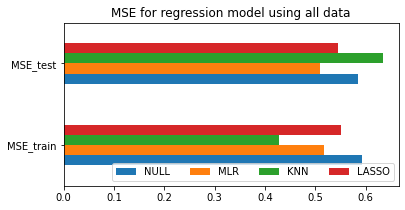

In [14]:
fig, ax = plt.subplots(figsize = (6,3))
models.plot(kind = "barh", ax = ax)
ax.set_title("MSE for regression model using all data")
ax.legend(loc = 4, ncol = 5)

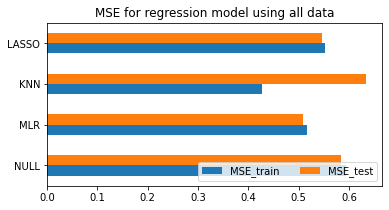

In [15]:
fig, ax = plt.subplots(figsize = (6,3))
models.T.plot(kind = "barh", ax = ax)
ax.set_title("MSE for regression model using all data")
ax.legend(loc = 4, ncol = 5)

Text(0, 0.5, 'Observed (Testing) target values')

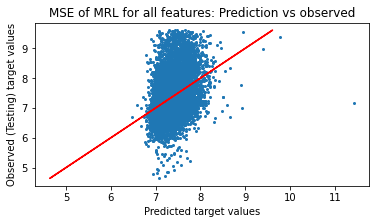

In [16]:
fig, ax = plt.subplots(figsize = (6, 3))
ax.scatter(MLR.predict(X_test), y_test, s = 4)
ax.plot(y_test, y_test, color = "red")
ax.set_title("MSE of MRL for all features: Prediction vs observed")
ax.set_xlabel("Predicted target values")
ax.set_ylabel("Observed (Testing) target values")

### Insight:
- This plot clearly shows that the linear model is not able to capture the dataset's behavior, correctly.
- So, it is recommended to apply tree based models such as random forest or XGBoost.